# Contents
1. Preamble
2. Overview
3. Business Problem
4. Importing, Exploring and Cleaning data.
      4.1.a. Importing and Accessing Data for "bom.movie_gross"
      4.1.b. Data Cleaning and Wrangling
      4.2.a. Import and Access Data 'imbd.title.basics'
      4.2.b. Data Cleaning and Wrangling
      4.3.a. Import and Access Dataset 'imbd.title.rating'
      4.3.b. Data cleaning and Wrangling
5. Data Engineering
6. Visualization and Data Exploration
7. Statistics and Data Modelling
8. Summary and Conclusion
  
   

# 1. Preamble

We want to demonstrate how to do an analysis similar to Phase 1 project.
We will use the data found in this repo: https://github.com/mirnadaye/movieproject

# 2. Overview

The data we studied iis from  three follwing datasets: bom.movie_gross.csv.gz, imdb.title.basics.csv.gz, imdb.title.ratings.csv.gz.
The data we are going to study is about movies types, ratings and profitable revenues.


# 3. Business Problem

Answer questions for Microsoft company which movie category the comapny should invest in and develp movie genres.
I will look for different movie categories in repect of ther averahe ratings, national and international revenues.


# 4. Importing, Exploring and Cleaning data

#### 4.1.a. Importing and Accessing Data for "bom.movie_gross"

In [12]:
# Import necessary libraries below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df=pd.read_csv('bom.movie_gross.csv.gz')
df.head(5)
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

#### 4.1.b. Data Cleaning and Wrangling

In [13]:
# Transform dtype of columns to float64
df[["domestic_gross", "foreign_gross"]] = df[["domestic_gross", "foreign_gross"]].apply(pd.to_numeric, errors='coerce')

In [14]:
#Make sure dtype of foreign_gross, domestic_gross is not object but numeric(float or integer)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [15]:
#Chek the sum of missing values for each column
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [16]:
# Fill the missing values in foreign_gross columns by mean values of the foreign_gross
df['foreign_gross'].fillna(value=df['foreign_gross'].mean())

0       6.520000e+08
1       6.913000e+08
2       6.643000e+08
3       5.357000e+08
4       5.139000e+08
            ...     
3382    7.505704e+07
3383    7.505704e+07
3384    7.505704e+07
3385    7.505704e+07
3386    7.505704e+07
Name: foreign_gross, Length: 3387, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


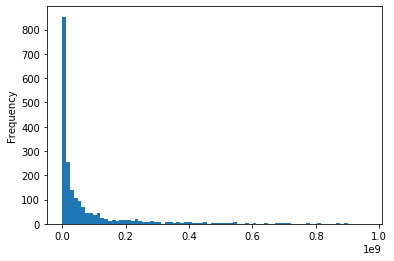

In [18]:
#Quick visualization by histogram method of foriegn_gross
df['foreign_gross'].plot(kind='hist', bins=80)

In [19]:
# Check sum missing values for each column in the dataset
df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

In [20]:
#Fill the missing values in foreign_gross column by the mean value of foreign_gross
mean_foreign_gross= df['foreign_gross'].mean()
df['foreign_gross'].fillna(mean_foreign_gross, inplace= True)
#df['foreign_gross']=df['foreign_gross'].fillna(value=df['foreign_gross'].mean())

In [21]:
#Check again if thesum of missing values for each column 
#make sure to check foreign_gross has no more missing values
df.isna().sum()

title              0
studio             5
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

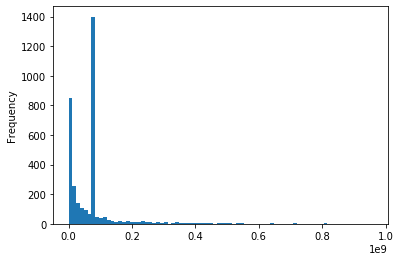

In [22]:
df['foreign_gross'].plot(kind='hist', bins=80)

In [23]:
# drop all other rows which have missing values mostly in studio and domestic_gross columns
df=df.dropna()

In [24]:
# Check again we do not have any missing values anymore
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [25]:
#Check if we still have numeric values for 'year', 'domestic_gross', 'foreign_gross'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3356 non-null   object 
 1   studio          3356 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   3356 non-null   float64
 4   year            3356 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 157.3+ KB


#### 4.2.a. Import and Access Data 'imbd.title.basics'

In [26]:
df1=pd.read_csv('imdb.title.basics.csv.gz')

df1.head()
df1.columns

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [27]:
#Check the informatin of my dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [28]:
#Acess the first 5 rows of the data set
df1.head(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


#### 4.2.b. Data Cleaning and Wrangling

In [29]:
#Check for the sum of missing values for each column
df1.isna().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [30]:
# Fill the missing values in runtime_minutes column by the mean value of runtime_minutes
mean_runtime_minutes= df1['runtime_minutes'].mean()
df1['runtime_minutes'].fillna(mean_runtime_minutes, inplace= True)

In [31]:
#Drop all missing values in all rows in the rest of the dataset
df1=df1.dropna()

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [33]:
#Check again for sum of missing values to make sure we handled all columns
df1.isna().sum()

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [34]:
# Check for duplicates in tconst column
df1.drop_duplicates(subset='tconst', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [35]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140734 entries, 0 to 140733
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   original_title   140734 non-null  object 
 3   start_year       140734 non-null  int64  
 4   runtime_minutes  140734 non-null  float64
 5   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.4+ MB


In [36]:
df1.tconst.unique()

array(['tt0063540', 'tt0066787', 'tt0069049', ..., 'tt9916622',
       'tt9916706', 'tt9916754'], dtype=object)

#### 4.3.a. Import and Access Dataset 'imbd.title.rating'

In [37]:
df2=pd.read_csv('imdb.title.ratings.csv.gz')


df2.head()
df2.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [38]:
df2.head(6)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326


#### 4.3.b. Data cleaning and Wrangling

In [39]:
#Check for the sum missing values 
df2.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [41]:
#Check for duplicates for tconst
df2.drop_duplicates(subset='tconst', inplace=True)

In [42]:
df2.reset_index(drop=True, inplace=True)

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [44]:
#Join two datasets df1 and df2 for new datset df3
df3 = df1.set_index('tconst').join(df2.set_index('tconst'), how='inner')

In [45]:

df3.head(200)
        

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.000000,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.000000,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.000000,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,86.187247,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.000000,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt0496375,Prisoners of the Sun,Prisoners of the Sun,2013,85.000000,"Action,Adventure,Horror",3.7,1106
tt0498351,The Hero of Color City,The Hero of Color City,2014,77.000000,"Animation,Family",4.0,431
tt0498381,Rings,Rings,2017,102.000000,"Drama,Horror,Mystery",4.5,34151


In [46]:
df3.isna().sum()

primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
dtype: int64

In [47]:
#Rename column'primary_title' to 'title' in datset df3
df3.rename(columns={'primary_title': 'title'}, inplace= True)

In [48]:
#Check the new named colum 'title'
df3.columns

Index(['title', 'original_title', 'start_year', 'runtime_minutes', 'genres',
       'averagerating', 'numvotes'],
      dtype='object')

In [49]:
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

# 5. Data engineering

In [50]:
# Join datasets df3 and df  for new dataset df4
df4 = df3.set_index('title').join(df.set_index('title'), how='inner')
df4.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,
'71,'71,2014,99.0,"Action,Drama,Thriller",7.2,46103,RAtt.,1300000.0,3.550000e+05,2015
"1,000 Times Good Night",Tusen ganger god natt,2013,117.0,"Drama,War",7.1,6848,FM,53900.0,7.505704e+07,2014
10 Cloverfield Lane,10 Cloverfield Lane,2016,103.0,"Drama,Horror,Mystery",7.2,260383,Par.,72100000.0,3.810000e+07,2016
10 Years,10 Years,2011,100.0,"Comedy,Drama,Romance",6.1,22484,Anch.,203000.0,7.505704e+07,2012
1001 Grams,1001 Gram,2014,93.0,Drama,6.3,1301,KL,11000.0,7.505704e+07,2015


In [51]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, '71 to Zootopia
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   2997 non-null   object 
 1   start_year       2997 non-null   int64  
 2   runtime_minutes  2997 non-null   float64
 3   genres           2997 non-null   object 
 4   averagerating    2997 non-null   float64
 5   numvotes         2997 non-null   int64  
 6   studio           2997 non-null   object 
 7   domestic_gross   2997 non-null   float64
 8   foreign_gross    2997 non-null   float64
 9   year             2997 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 257.6+ KB


In [52]:
df4.isna().sum()

original_title     0
start_year         0
runtime_minutes    0
genres             0
averagerating      0
numvotes           0
studio             0
domestic_gross     0
foreign_gross      0
year               0
dtype: int64

In [53]:
# Check unique values for 'genres' and 'studio' columns.
 for col in ['genres','studio']:
    print('Values for {}:\n{}\n\n'.format(col, df4[col].unique()))

IndentationError: unexpected indent (<ipython-input-53-79a5a5540908>, line 2)

In [54]:
# Count values for genres column in df4 dataset
x=df4.genres.value_counts(normalize=True)

In [55]:
#Check unique values for genres in df4 dataset
df4.genres.nunique()

319

In [145]:
# create datasets for each category of movie 'genres'
# Slice the dataframe into seprate dataframes by 'genres'
Documentary_df = df4[df4['genres'] == 'Documentary']
Drama_df = df4[df4['genres'] == 'Drama']
Sport_df = df4[df4['genres'] == 'Sport']
Action_df = df4[df4['genres'] == 'Action'] 
Animation_df = df4[df4['genres'] == 'Animation']
Romance_df = df4[df4['genres'] == 'Romance']
Adventure_df = df4[df4['genres'] == 'Adventure']
Fantasy_df = df4[df4['genres'] == 'Fantasy']
Music_df = df4[df4['genres'] == 'Music']
Crime_df = df4[df4['genres'] == 'Crime']
Comedy_df = df4[df4['genres'] == 'Comedy']
History_df = df4[df4['genres'] == 'History']
Family_df = df4[df4['genres'] == 'Family']
Musical_df = df4[df4['genres'] == 'Musical']
#Sci-Fi_df = df4[df4['genres'] == 'Sci-Fi']
Horror_df = df4[df4['genres'] == 'Horror']
Mystery_df = df4[df4['genres'] == 'Mystery']
Thriller_df = df4[df4['genres'] == 'Thriller']

In [57]:
Documentary_df.head(100)
Documentary_df.original_title.nunique()

107

## 6. Visulization and Data Exploration

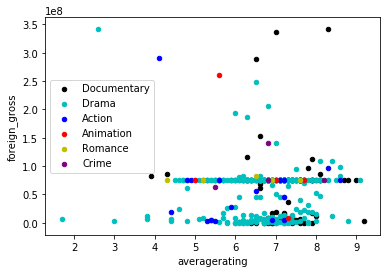

In [58]:
#Create scatter plot for all movie categories created vs foreign_gross in same plot

ax = Documentary_df.plot.scatter(x='averagerating', y='foreign_gross', c='k', label='Documentary')
Drama_df.plot.scatter(x='averagerating', y='foreign_gross', c='c', label='Drama', ax=ax)
Action_df.plot.scatter(x='averagerating', y='foreign_gross', c='b', label='Action', ax=ax)
Animation_df.plot.scatter(x='averagerating', y='foreign_gross', c='r', label='Animation', ax=ax)
Romance_df.plot.scatter(x='averagerating', y='foreign_gross', c='y', label='Romance', ax=ax)
Crime_df.plot.scatter(x='averagerating', y='foreign_gross', c='purple', label='Crime', ax=ax)

In [59]:
grouped_df4=df4.groupby('genres').sum()

In [60]:
#Create a function that take dataframe, averagerating  column.
#The function display distplot visualization from seaborn.
def show_distplot(dataframe, type, column_name):
    plt.plot()
    dataframe[column_name].hist()
    plt.title('Average rating of {}'.format(type))
    plt.xlabel(column_name)
    plt.ylabel('Probability Density')
    plt.show()
    


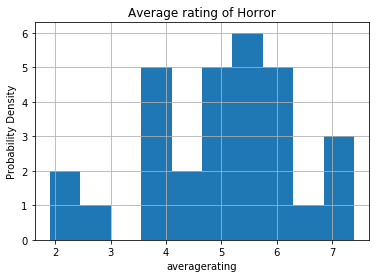

Mean average rating: 5.03
Median average rating: 5.15


In [61]:
# Visualization for Horror_df and calculation mean and median for rating for Horror_df
show_distplot(Horror_df, 'Horror',  'averagerating')
print('Mean average rating: {}'.format(Horror_df.averagerating.mean()))
print('Median average rating: {}'.format(Horror_df.averagerating.median()))

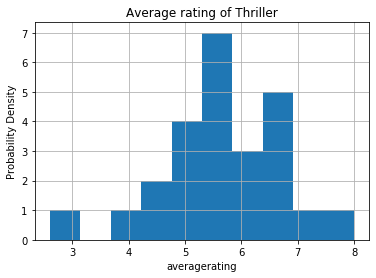

Mean average rating: 5.672
Median average rating: 5.7


In [62]:
#Visualization for Thriller_df and calculation mean and median for rating for Thriller_df
show_distplot(Thriller_df, 'Thriller',  'averagerating')
print('Mean average rating: {}'.format(Thriller_df.averagerating.mean()))
print('Median average rating: {}'.format(Thriller_df.averagerating.median()))

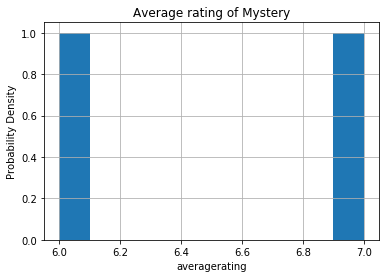

Mean average rating: 6.5
Median average rating: 6.5


In [146]:
##Visualization for Mystery_df and calculation mean and median for rating for Mystery_df
#We will exclude the mystery_df since the data is not representive
show_distplot(Mystery_df, 'Mystery',  'averagerating')
print('Mean average rating: {}'.format(Mystery_df.averagerating.mean()))
print('Median average rating: {}'.format(Mystery_df.averagerating.median()))

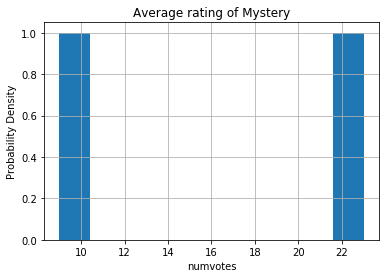

Mean average rating: 16.0
Median average rating: 16.0


In [147]:
###Visualization for Mystery_df and calculation mean and median fornumber of votes for Mystery_df
show_distplot(Mystery_df, 'Mystery',  'numvotes')
print('Mean average rating: {}'.format(Mystery_df.numvotes.mean()))
print('Median average rating: {}'.format(Mystery_df.numvotes.median()))

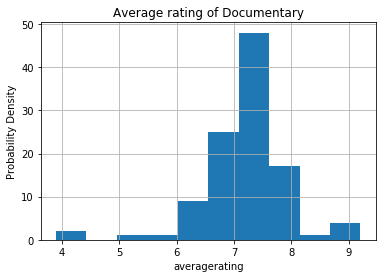

Mean average rating: 7.212037037037033
Median average rating: 7.3


In [65]:
###Visualization for documentary_df and calculation mean and median for rating for documentaryy_df
show_distplot(Documentary_df, 'Documentary',  'averagerating')
print('Mean average rating: {}'.format(Documentary_df.averagerating.mean()))
print('Median average rating: {}'.format(Documentary_df.averagerating.median()))


In [66]:
# Subplot for Documentary
z=Documentary_df.groupby('year')['foreign_gross'].count()
#df['foreign_gross'].plot(kind='hist', bins=80)
#z.plot(kind='hist', bins =80)
print(z)

year
2010    11
2011    14
2012    14
2013     9
2014    10
2015    17
2016    12
2017    17
2018     4
Name: foreign_gross, dtype: int64


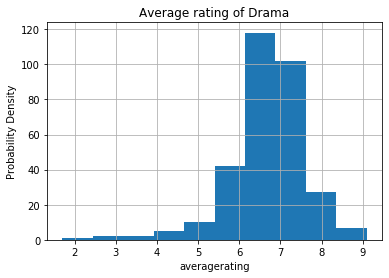

Mean average rating: 6.678481012658225
Median average rating: 6.8


In [67]:
###Visualization for Drama_df and calculation mean and median for rating for Drama_df
show_distplot(Drama_df, 'Drama',  'averagerating')
print('Mean average rating: {}'.format(Drama_df.averagerating.mean()))
print('Median average rating: {}'.format(Drama_df.averagerating.median()))

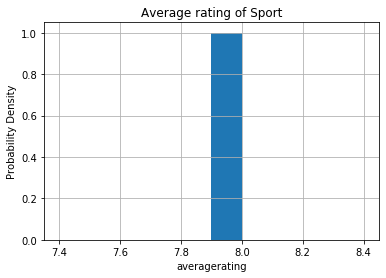

Mean average rating: 7.9
Median average rating: 7.9


In [148]:
###Visualization for Sport_df and calculation mean and median for rating for Sport_df
#We will exclude the Sport_df since the data is not representive
show_distplot(Sport_df, 'Sport', 'averagerating')
print('Mean average rating: {}'.format(Sport_df.averagerating.mean()))
print('Median average rating: {}'.format(Sport_df.averagerating.median()))

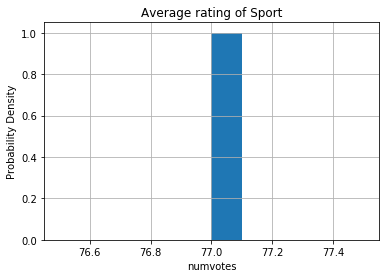

Mean average rating: 77.0
Median average rating: 77.0


In [149]:
###Visualization for Sport_df and calculation mean and median for numberof votes for Sport_df
show_distplot(Sport_df, 'Sport', 'numvotes')
print('Mean average rating: {}'.format(Sport_df.numvotes.mean()))
print('Median average rating: {}'.format(Sport_df.numvotes.median()))

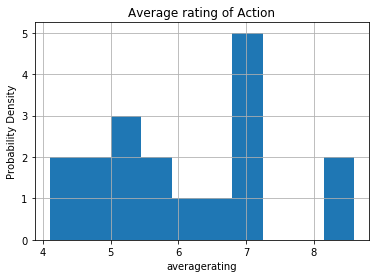

Mean average rating: 6.116666666666668
Median average rating: 5.75


In [150]:
####Visualization for Action_df and calculation mean and median for rating for Action_df
show_distplot(Action_df, 'Action', 'averagerating')
print('Mean average rating: {}'.format(Action_df.averagerating.mean()))
print('Median average rating: {}'.format(Action_df.averagerating.median()))

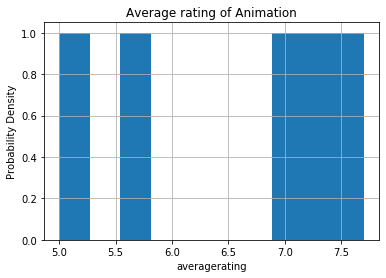

Mean average rating: 6.519999999999999
Median average rating: 7.0


In [151]:
##Visualization for Animation_df and calculation mean and median for rating for Animation_df
show_distplot(Animation_df, 'Animation', 'averagerating')
print('Mean average rating: {}'.format(Animation_df.averagerating.mean()))
print('Median average rating: {}'.format(Animation_df.averagerating.median()))

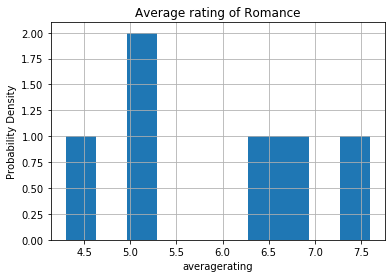

Mean average rating: 5.95
Median average rating: 5.85


In [152]:
#####Visualization for Romance_df and calculation mean and median for rating for Romance_df
show_distplot(Romance_df, 'Romance', 'averagerating')
print('Mean average rating: {}'.format(Romance_df.averagerating.mean()))
print('Median average rating: {}'.format(Romance_df.averagerating.median()))

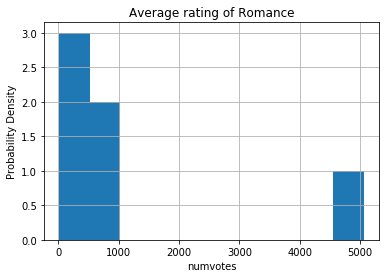

Mean average rating: 1176.6666666666667
Median average rating: 431.0


In [153]:
#####Visualization for Romance_df and calculation mean and median for number of votes for Romance_df
show_distplot(Romance_df, 'Romance', 'numvotes')
print('Mean average rating: {}'.format(Romance_df.numvotes.mean()))
print('Median average rating: {}'.format(Romance_df.numvotes.median()))

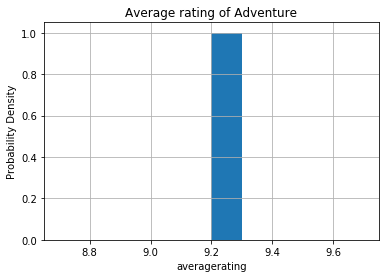

Mean average rating: 9.2
Median average rating: 9.2


In [154]:
#####Visualization for Adventure_df and calculation mean and median for rating for Adventure_df
##We will exclude the Adventure_df since the data is not representive
show_distplot(Adventure_df, 'Adventure', 'averagerating')
print('Mean average rating: {}'.format(Adventure_df.averagerating.mean()))
print('Median average rating: {}'.format(Adventure_df.averagerating.median()))

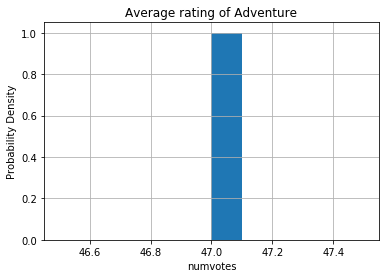

Mean average rating: 47.0
Median average rating: 47.0


In [155]:
######Visualization for Adventure_df and calculation mean and median for number of votes for Adventure_df
show_distplot(Adventure_df, 'Adventure', 'numvotes')
print('Mean average rating: {}'.format(Adventure_df.numvotes.mean()))
print('Median average rating: {}'.format(Adventure_df.numvotes.median()))

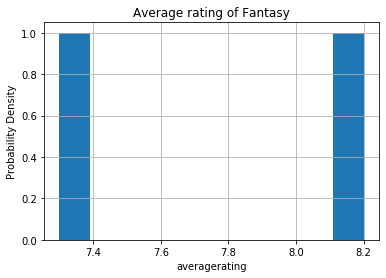

Mean average rating: 7.75
Median average rating: 7.75


In [156]:
###Visualization for Fantasy_df and calculation mean and median for rating for Fantasy _df
show_distplot(Fantasy_df, 'Fantasy', 'averagerating')
print('Mean average rating: {}'.format(Fantasy_df.averagerating.mean()))
print('Median average rating: {}'.format(Fantasy_df.averagerating.median()))

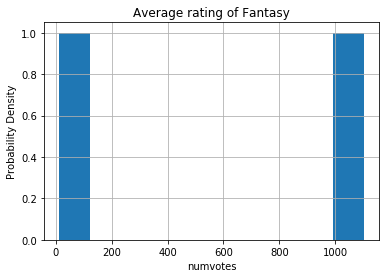

Mean average rating: 557.0
Median average rating: 557.0


In [157]:
###Visualization for Fantasy_df and calculation mean and median for number of votes for Fantasy _df
show_distplot(Fantasy_df, 'Fantasy', 'numvotes')
print('Mean average rating: {}'.format(Fantasy_df.numvotes.mean()))
print('Median average rating: {}'.format(Fantasy_df.numvotes.median()))

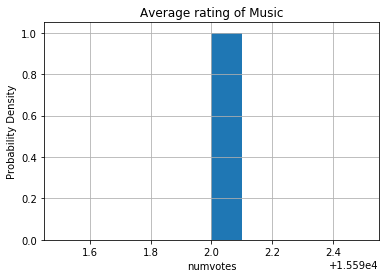

Mean average rating: 15592.0
Median average rating: 15592.0


In [158]:
###Visualization for Music_df and calculation mean and median for number of votes for Music _df
show_distplot(Music_df, 'Music', 'numvotes')
print('Mean average rating: {}'.format(Music_df.numvotes.mean()))
print('Median average rating: {}'.format(Music_df.numvotes.median()))

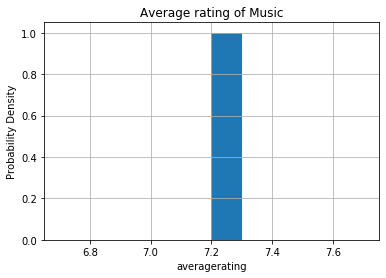

Mean average rating: 7.2
Median average rating: 7.2


In [159]:
###Visualization for Music_df and calculation mean and median for rating for Music _df
show_distplot(Music_df, 'Music', 'averagerating')
print('Mean average rating: {}'.format(Music_df.averagerating.mean()))
print('Median average rating: {}'.format(Music_df.averagerating.median()))

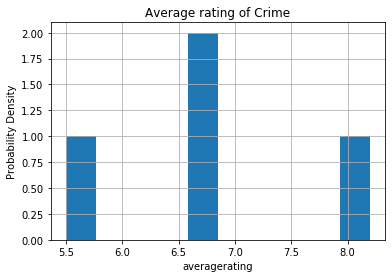

Mean average rating: 6.825
Median average rating: 6.8


In [160]:
###Visualization for Crime_df and calculation mean and median for rating for Crime _df
show_distplot(Crime_df, 'Crime', 'averagerating')
print('Mean average rating: {}'.format(Crime_df.averagerating.mean()))
print('Median average rating: {}'.format(Crime_df.averagerating.median()))

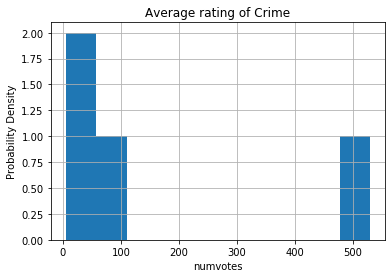

Mean average rating: 161.75
Median average rating: 56.0


In [161]:
####Visualization for Crime_df and calculation mean and median for number of votes for Crime _df
show_distplot(Crime_df, 'Crime', 'numvotes')
print('Mean average rating: {}'.format(Crime_df.numvotes.mean()))
print('Median average rating: {}'.format(Crime_df.numvotes.median()))

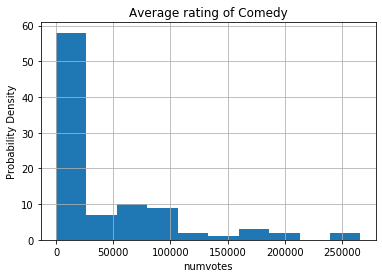

Mean average rating: 41247.64893617021
Median average rating: 8909.5


In [162]:
#####Visualization for Comedy_df and calculation mean and median for number of votes for Comedy _df
show_distplot(Comedy_df, 'Comedy', 'numvotes')
print('Mean average rating: {}'.format(Comedy_df.numvotes.mean()))
print('Median average rating: {}'.format(Comedy_df.numvotes.median()))

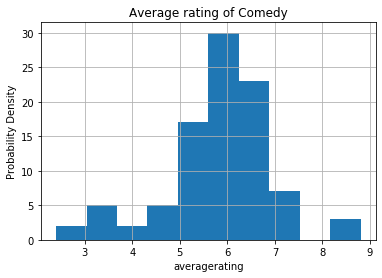

Mean average rating: 5.827659574468084
Median average rating: 6.0


In [163]:
#####Visualization for Comedy_df and calculation mean and median for rating for Comedy _df
show_distplot(Comedy_df, 'Comedy', 'averagerating')
print('Mean average rating: {}'.format(Comedy_df.averagerating.mean()))
print('Median average rating: {}'.format(Comedy_df.averagerating.median()))

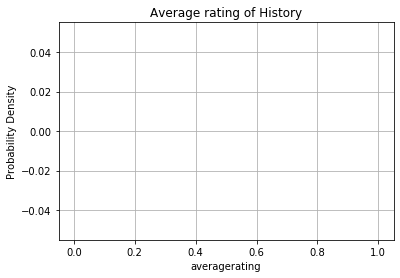

Mean average rating: nan
Median average rating: nan


In [164]:
show_distplot(History_df, 'History', 'averagerating')
print('Mean average rating: {}'.format(History_df.averagerating.mean()))
print('Median average rating: {}'.format(History_df.averagerating.median()))

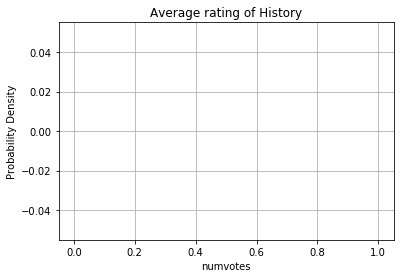

Mean average rating: nan
Median average rating: nan


In [165]:
show_distplot(History_df, 'History', 'numvotes')
print('Mean average rating: {}'.format(History_df.numvotes.mean()))
print('Median average rating: {}'.format(History_df.numvotes.median()))

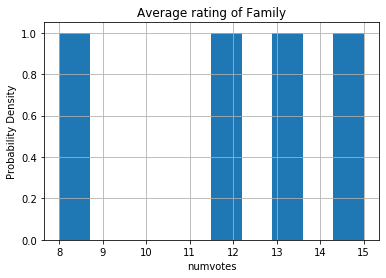

Mean average rating: 12.0
Median average rating: 12.5


In [166]:
######Visualization for Family_df and calculation mean and median for number of votes for Family _df
show_distplot(Family_df, 'Family', 'numvotes')
print('Mean average rating: {}'.format(Family_df.numvotes.mean()))
print('Median average rating: {}'.format(Family_df.numvotes.median()))

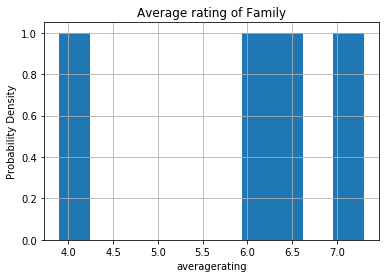

Mean average rating: 5.949999999999999
Median average rating: 6.300000000000001


In [167]:
##Visualization for Family_df and calculation mean and median for rating for Family _df
show_distplot(Family_df, 'Family', 'averagerating')
print('Mean average rating: {}'.format(Family_df.averagerating.mean()))
print('Median average rating: {}'.format(Family_df.averagerating.median()))

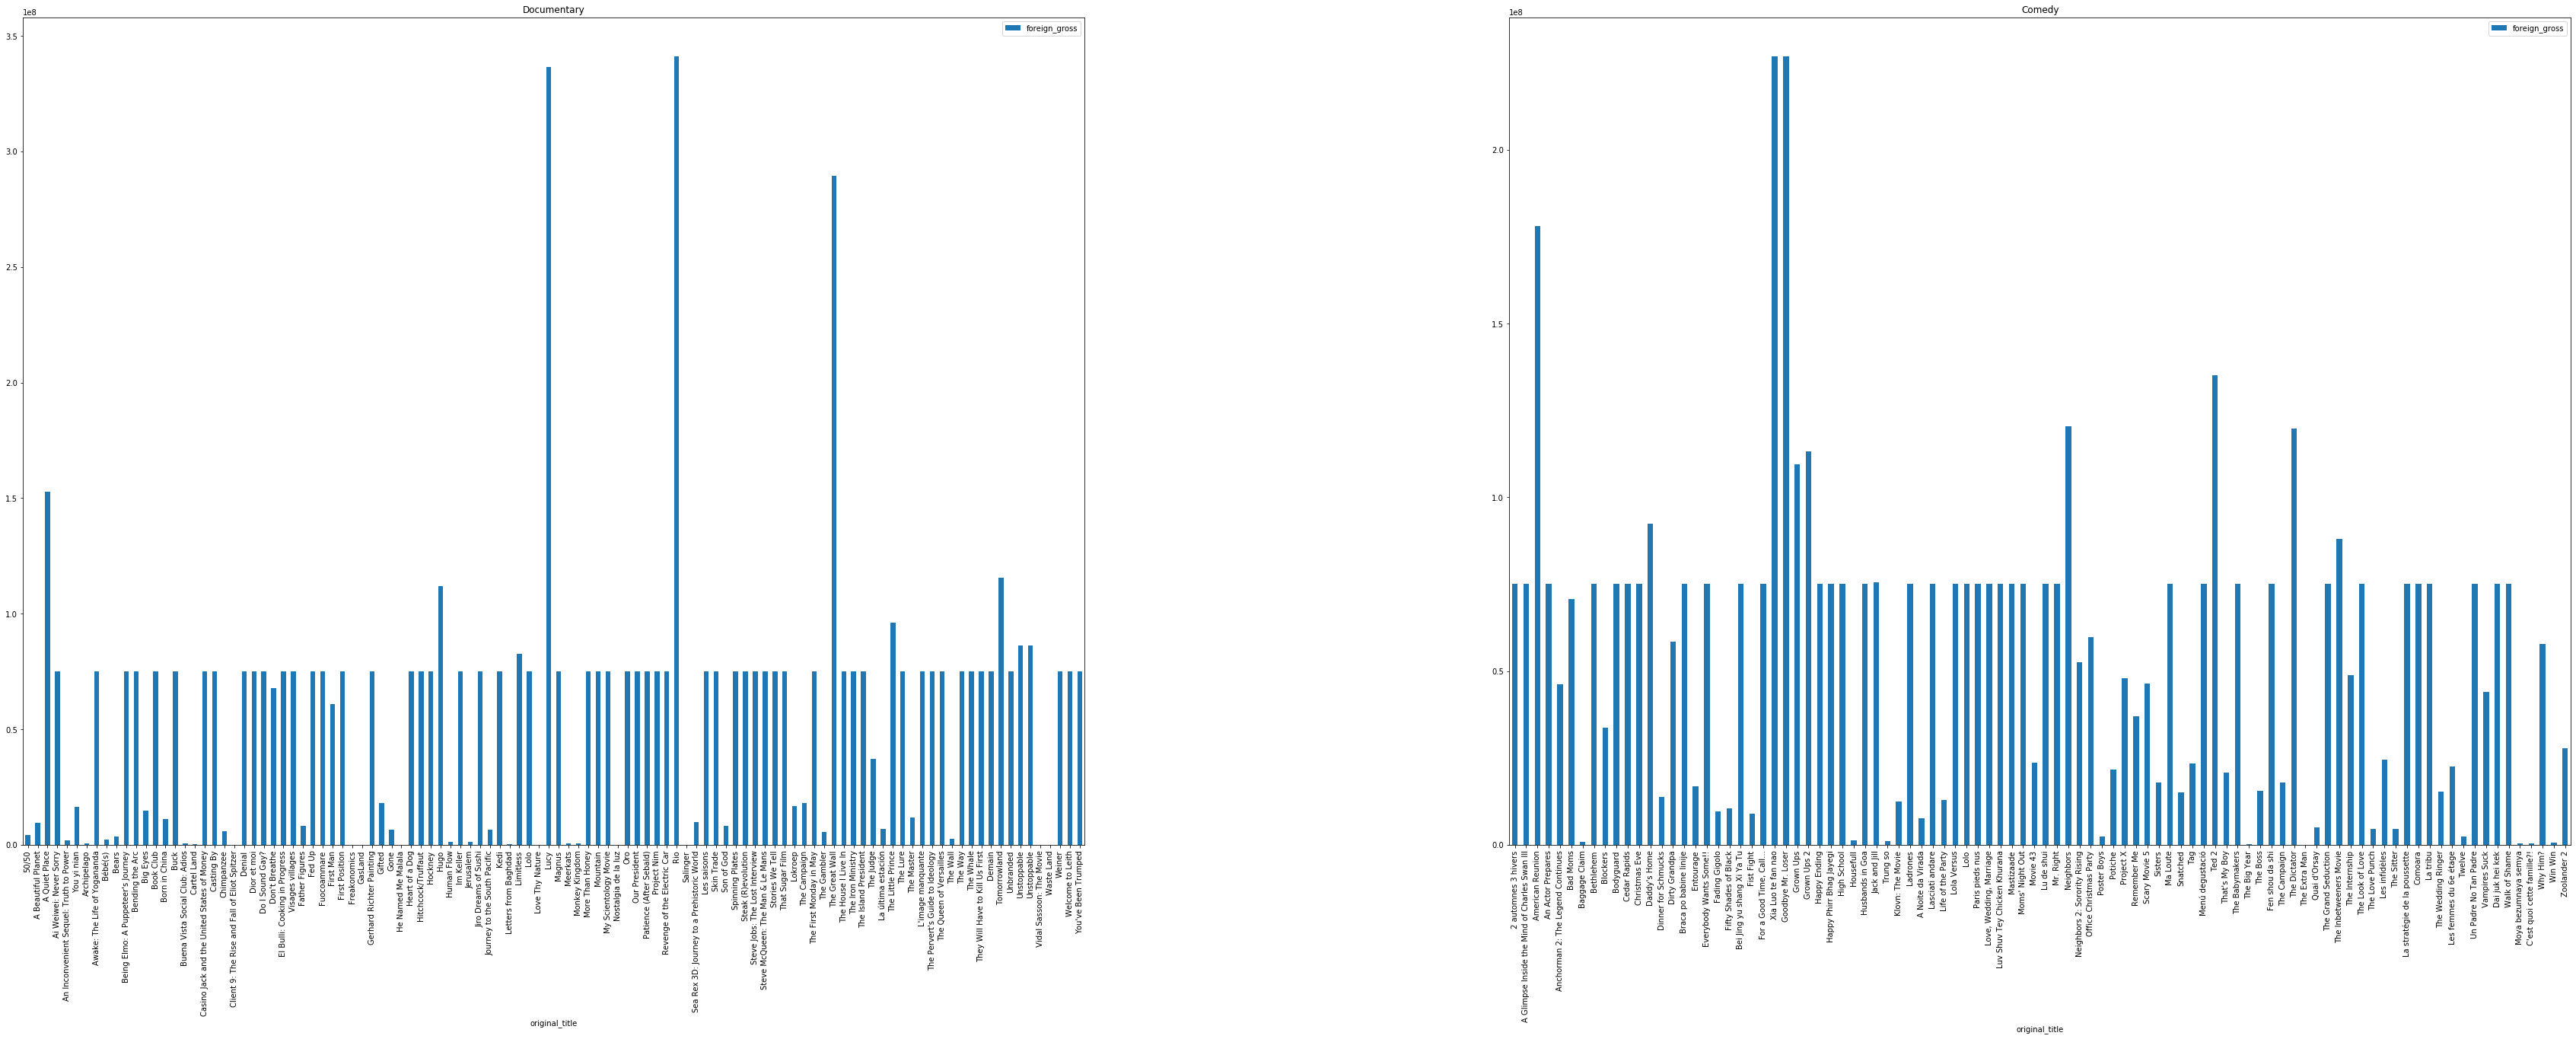

In [168]:
# Create subplot figure for df_documentary and comedy_df dataframes vs foreign_gross
plt.figure(figsize=(60, 20))
ax1 = plt.subplot(1, 2, 1)
Documentary_df.plot.bar(x='original_title', y='foreign_gross', ax=ax1)
ax1.set_title("Documentary")

ax2 = plt.subplot(1, 2, 2)
Comedy_df.plot.bar(x='original_title', y='foreign_gross', ax=ax2)
ax2.set_title('Comedy')
plt.subplots_adjust(wspace=0.4)

In [169]:
# Group doumentary_df by (original_title, foreign_gross and domestic_gross) and get the mean values
Documentary_df.groupby(['original_title', 'foreign_gross',  'domestic_gross']).mean().head()

,,,start_year,runtime_minutes,averagerating,numvotes,year
original_title,foreign_gross,domestic_gross,,,,,
50/50,4.200000e+06,35000000.0,2010.0,77.0,7.5,11.0,2011.0
A Beautiful Planet,9.400000e+06,15500000.0,2016.0,46.0,7.4,893.0,2016.0
A Quiet Place,1.529000e+08,188000000.0,2016.0,80.0,6.6,18.0,2018.0
Ai Weiwei: Never Sorry,7.505704e+07,534000.0,2012.0,91.0,7.6,3974.0,2012.0
An Inconvenient Sequel: Truth to Power,1.900000e+06,3500000.0,2017.0,98.0,6.3,6752.0,2017.0


In [170]:
#Combine all representative movie category dataframes in one dataset df5

Documentary_df = df4[df4['genres'] == 'Documentary']
Drama_df = df4[df4['genres'] == 'Drama']
#Sport_df = df4[df4['genres'] == 'Sport']
Action_df = df4[df4['genres'] == 'Action'] 
Animation_df = df4[df4['genres'] == 'Animation']
Romance_df = df4[df4['genres'] == 'Romance']
#Adventure_df = df4[df4['genres'] == 'Adventure']
Fantasy_df = df4[df4['genres'] == 'Fantasy']
Music_df = df4[df4['genres'] == 'Music']
Crime_df = df4[df4['genres'] == 'Crime']
Comedy_df = df4[df4['genres'] == 'Comedy']
#History_df = df4[df4['genres'] == 'History']
#Family_df = df4[df4['genres'] == 'Family']
#Musical_df = df4[df4['genres'] == 'Musical']
#Sci-Fi_df = df4[df4['genres'] == 'Sci-Fi']
Horror_df = df4[df4['genres'] == 'Horror']
#Mystery_df = df4[df4['genres'] == 'Mystery']
Thriller_df = df4[df4['genres'] == 'Thriller']
df5=pd.concat([Documentary_df,Drama_df, Fantasy_df, Music_df, Action_df,Animation_df, Romance_df, Crime_df, Comedy_df, Horror_df, Thriller_df])


In [171]:
df5.head()

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
title,,,,,,,,,,
50/50,50/50,2010,77.0,Documentary,7.5,11,Sum.,35000000.0,4.200000e+06,2011
A Beautiful Planet,A Beautiful Planet,2016,46.0,Documentary,7.4,893,Imax,15500000.0,9.400000e+06,2016
A Quiet Place,A Quiet Place,2016,80.0,Documentary,6.6,18,Par.,188000000.0,1.529000e+08,2018
Ai Weiwei: Never Sorry,Ai Weiwei: Never Sorry,2012,91.0,Documentary,7.6,3974,IFC,534000.0,7.505704e+07,2012
An Inconvenient Sequel: Truth to Power,An Inconvenient Sequel: Truth to Power,2017,98.0,Documentary,6.3,6752,Par.,3500000.0,1.900000e+06,2017


In [172]:
# Group df5 dataset by origina_title, foreign_gross and domestic_gross and get the max 10 values
df5.groupby(['original_title', 'foreign_gross',  'domestic_gross']).max().head(10)

,,,start_year,runtime_minutes,genres,averagerating,numvotes,studio,year
original_title,foreign_gross,domestic_gross,,,,,,,
1001 Gram,7.505704e+07,11000.0,2014,93.0,Drama,6.3,1301,KL,2015
120 battements par minute,7.505704e+07,125000.0,2017,143.0,Drama,7.5,10507,Orch.,2017
17 filles,1.860000e+05,15100.0,2011,86.0,Drama,6.0,2980,Strand,2012
2 automnes 3 hivers,7.505704e+07,5800.0,2013,91.0,Comedy,6.7,582,FM,2014
2:22,7.505704e+07,400.0,2017,98.0,Thriller,5.8,16318,Magn.,2017
3 Generations,3.750000e+05,156000.0,2015,92.0,Drama,5.8,4991,Wein.,2017
50/50,4.200000e+06,35000000.0,2010,77.0,Documentary,7.5,11,Sum.,2011
99 Homes,7.505704e+07,1400000.0,2014,112.0,Drama,7.1,26699,BG,2015
A Beautiful Planet,9.400000e+06,15500000.0,2016,46.0,Documentary,7.4,893,Imax,2016


In [173]:
#grouped = df5.groupby(['genres'])['domestic_gross', 'foreign_gross'].agg(['mean', 'min', 'max', 'std'])
                                                             
                                          

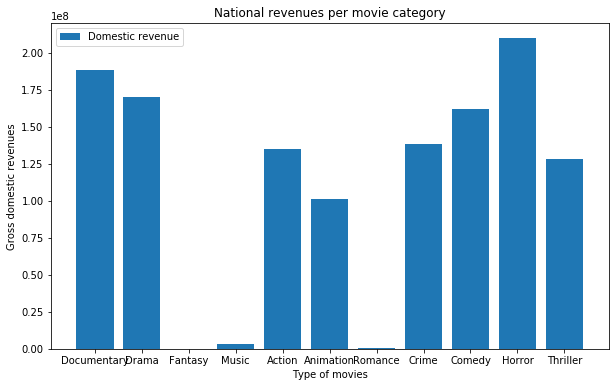

In [174]:
# Create a bar plot for nationl revenues vs movie category
x=df5.loc[:, 'genres']
y=df5.loc[:, 'domestic_gross']
plt.figure(figsize=(10,6))

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, label='Domestic revenue')

plt.xlabel('Type of movies')
plt.ylabel('Gross domestic revenues')

plt.title('National revenues per movie category')
plt.legend()

# Output the final plot
plt.show()

In [175]:
# Create figure
#plt.figure(figsize=(20, 10))
#ax1 = plt.subplot(1, 2, 1)
#df5.plot.bar(x='genres', y='domestic_gross', ax=ax1)
#ax1.set_title("National revenue")

#ax2 = plt.subplot(1, 2, 2)
#df5.plot.bar(x='genres', y='foreign_gross', ax=ax2)
#ax2.set_title('International revenue')
#plt.subplots_adjust(wspace=0.4)

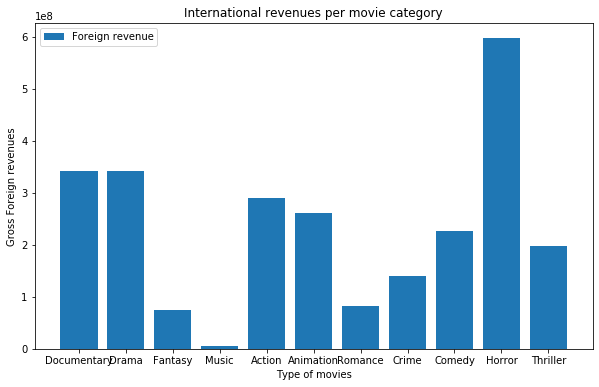

In [176]:
# Create a bar plot for Internationl revenues vs movie category
x=df5.loc[:, 'genres']
y=df5.loc[:, 'foreign_gross']
plt.figure(figsize=(10,6))

# Use the bar() function to create a plot using the above values of x and y. Add a label.
plt.bar(x, y, label='Foreign revenue')

plt.xlabel('Type of movies')
plt.ylabel('Gross Foreign revenues')

plt.title('International revenues per movie category')
plt.legend()

# Output the final plot
plt.show()

Text(0.5, 0, 'Category of movies type')

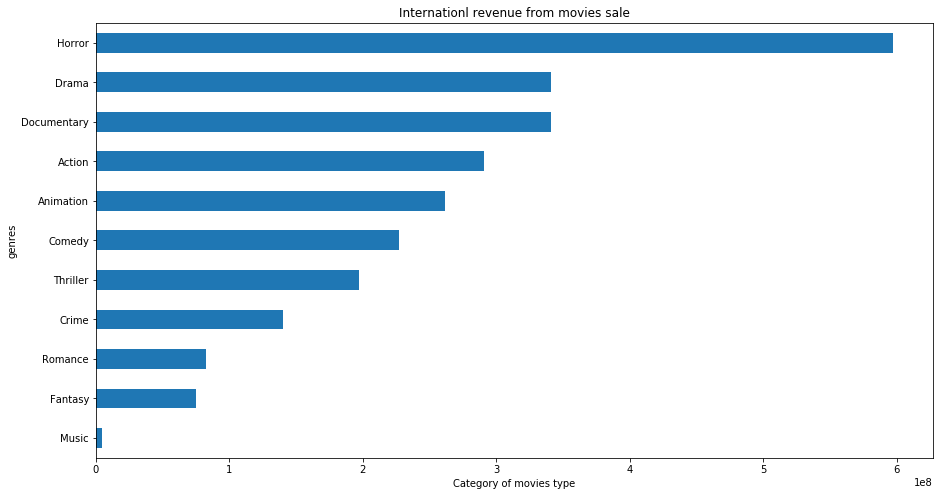

In [177]:
#Group genres by foreign_gross and get the max values and plot
df5.groupby(['genres'])['foreign_gross'].max().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Internationl revenue from movies sale')
plt.xlabel("Category of movies type")

Text(0.5, 0, 'Category of movies type')

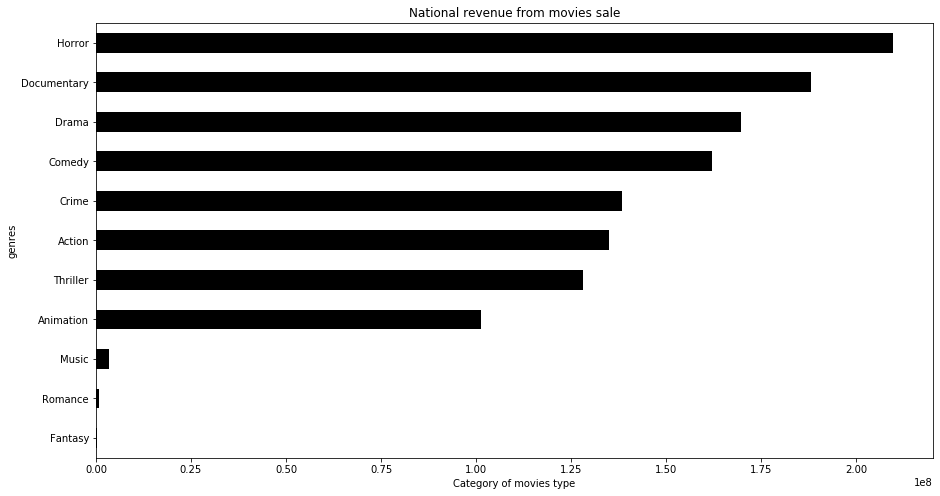

In [178]:
##Group genres by domestic_gross and get the max values and plot
df5.groupby(['genres'])['domestic_gross'].max().sort_values().plot(kind='barh', figsize=(15,8), color='black')
plt.title('National revenue from movies sale')
plt.xlabel("Category of movies type")

Text(0.5, 0, 'Category of movies type')

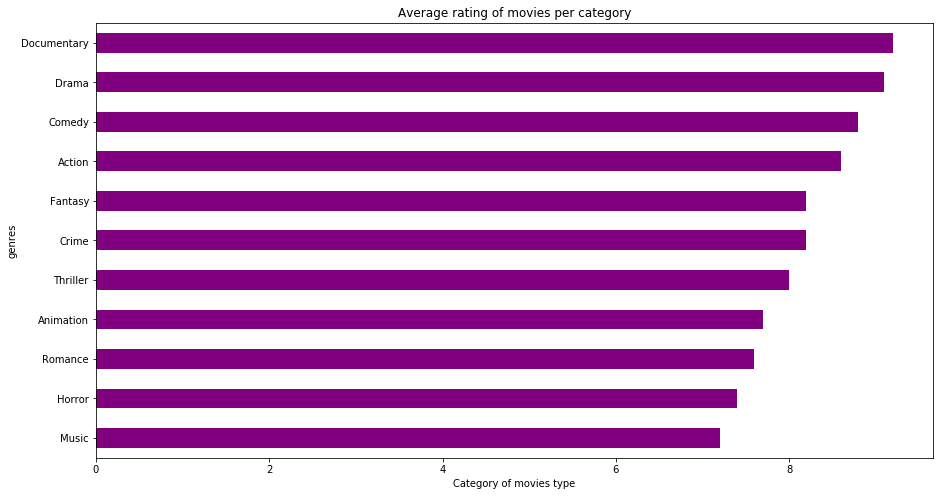

In [179]:
##Group genres by averagerating and get the max values and plot
df5.groupby(['genres'])['averagerating'].max().sort_values().plot(kind='barh', figsize=(15,8), color='purple')
plt.title('Average rating of movies per category')
plt.xlabel("Category of movies type")

In [180]:
#Group genres, foreign_gross and domestic_gross and get the mean values
df5.groupby(['genres', 'foreign_gross', 'domestic_gross']).mean().head(10)

start_year  runtime_minutes  \
genres foreign_gross domestic_gross                                
Action 2.500000e+06  2300000.0           2010.0        86.187247   
       3.300000e+06  2500.0              2013.0       104.000000   
       4.099999e+06  15600000.0          2012.0        95.000000   
       4.800000e+06  17500.0             2010.0        86.187247   
       5.300000e+06  134000.0            2013.0       154.000000   
       1.950000e+07  134900000.0         2012.0        87.000000   
       2.860000e+07  777000.0            2012.0       140.000000   
       4.580000e+07  251000.0            2011.0       122.000000   
       5.550000e+07  476000.0            2017.0       125.000000   
       7.505704e+07  16800.0             2013.0       106.000000   

                                     averagerating  numvotes    year  
genres foreign_gross domestic_gross                                   
Action 2.500000e+06  2300000.0                 5.5      12.0  2017.0  
       3.300000e+06  2500.0                    5.3    6142.0  2014.0  
       4.099999e+06  15600000.0                5.4   58185.0  2012.0  
       4.800000e+06  17500.0                   7.2       8.0  2015.0  
       5.300000e+06  134000.0                  6.9     966.0  2013.0  
       1.950000e+07  134900000.0               4.4      14.0  2014.0  
       2.860000e+07  777000.0                  5.9   18953.0  2012.0  
       4.580000e+07  251000.0                  7.2   10214.0  2011.0  
       5.550000e+07  476000.0                  6.5    1828.0  2017.0  
       7.505704e+07  16800.0                   4.8     997.0  2015.0

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


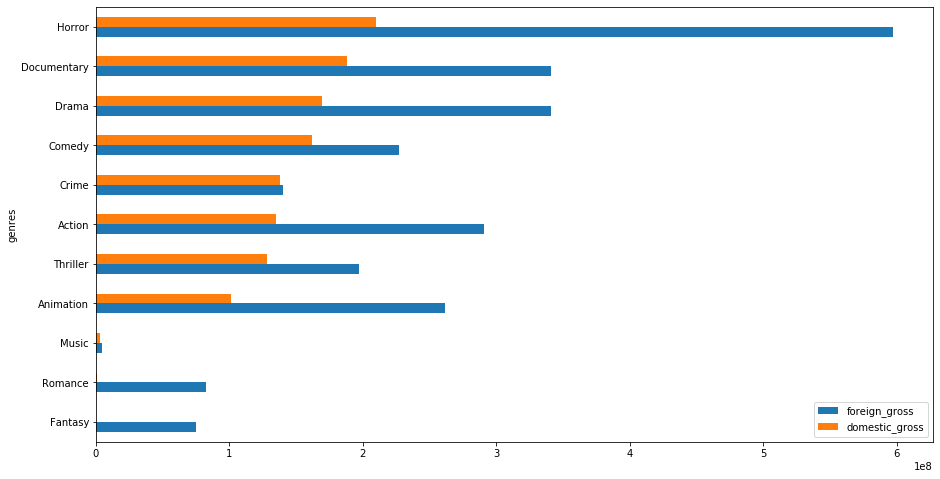

In [181]:
#Group genres by foreign_gross and domestic values plot by maximum values of domestic_gross
df5.groupby(['genres'])['foreign_gross', 'domestic_gross'].max().sort_values('domestic_gross').plot(kind='barh', figsize=(15,8))

In [182]:
? sort_values()

Object ` sort_values()` not found.


In [183]:
#Get the mean values for the domestic_gross for each movies category
df5.groupby(['genres'])['domestic_gross'].mean().sort_values().head(13)

genres
Fantasy        1.019000e+05
Romance        3.600000e+05
Music          3.400000e+06
Drama          9.644601e+06
Action         1.032559e+07
Documentary    1.570153e+07
Thriller       2.013986e+07
Comedy         2.508131e+07
Animation      2.541484e+07
Horror         3.050718e+07
Crime          4.357272e+07
Name: domestic_gross, dtype: float64

In [184]:
##Get the mean values for the foreign_gross for each movies category
df5.groupby(['genres'])['foreign_gross'].mean().sort_values().head(13)

genres
Music          4.600000e+06
Fantasy        3.822852e+07
Drama          5.641248e+07
Comedy         5.642278e+07
Documentary    5.867995e+07
Action         6.008329e+07
Thriller       6.789375e+07
Romance        7.623087e+07
Horror         7.776632e+07
Crime          8.815352e+07
Animation      9.903422e+07
Name: foreign_gross, dtype: float64

Text(0.5, 0, 'Domestic revenue')

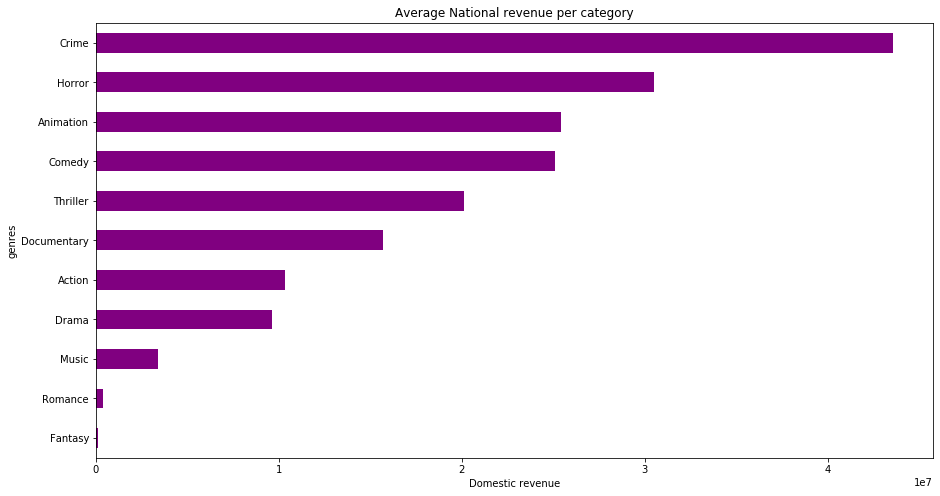

In [185]:
#Group genre by domestic_gross get the mean values and plot bar graph
df5.groupby(['genres'])['domestic_gross'].mean().sort_values().plot(kind='barh', figsize=(15,8), color='purple')
plt.title('Average National revenue per category')
plt.xlabel("Domestic revenue")

Text(0.5, 0, 'Foreign revenue')

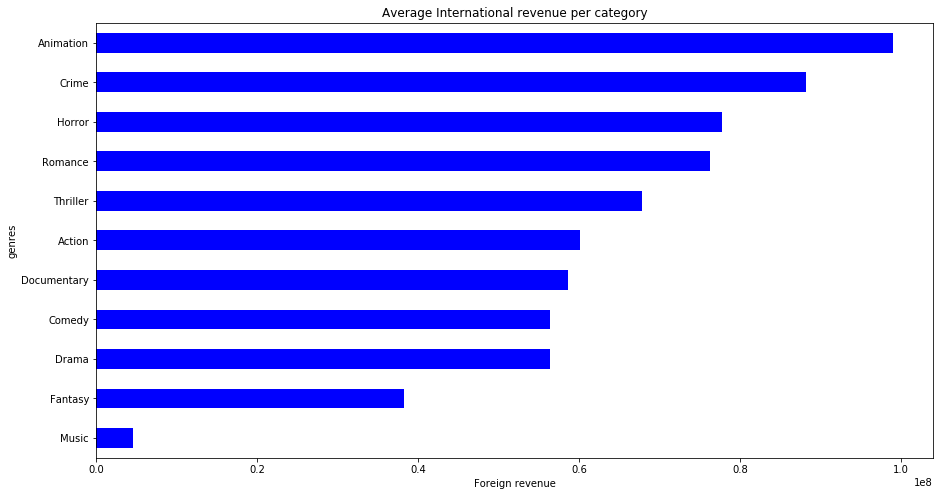

In [186]:
##Group genre by foreign_gross get the mean values and plot bar graph
df5.groupby(['genres'])['foreign_gross'].mean().sort_values().plot(kind='barh', figsize=(15,8), color='blue')
plt.title('Average International revenue per category')
plt.xlabel("Foreign revenue")

C:\Users\mirnamamaranda\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


Text(0.5, 0, 'Revenue in dollars')

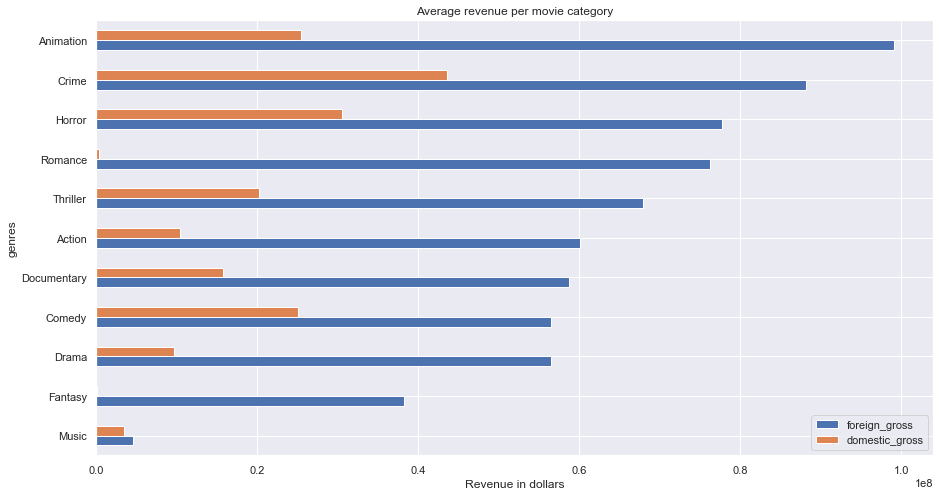

In [235]:
#Plot movie categories mean values for national and international revenues in the same figure
df5.groupby(['genres'])['foreign_gross', 'domestic_gross'].mean().sort_values('foreign_gross').plot(kind='barh', figsize=
                                                                                                    (15,8))
plt.title('Average revenue per movie category')
plt.xlabel("Revenue in dollars")

Text(0.5, 0, 'Average ratings of movies')

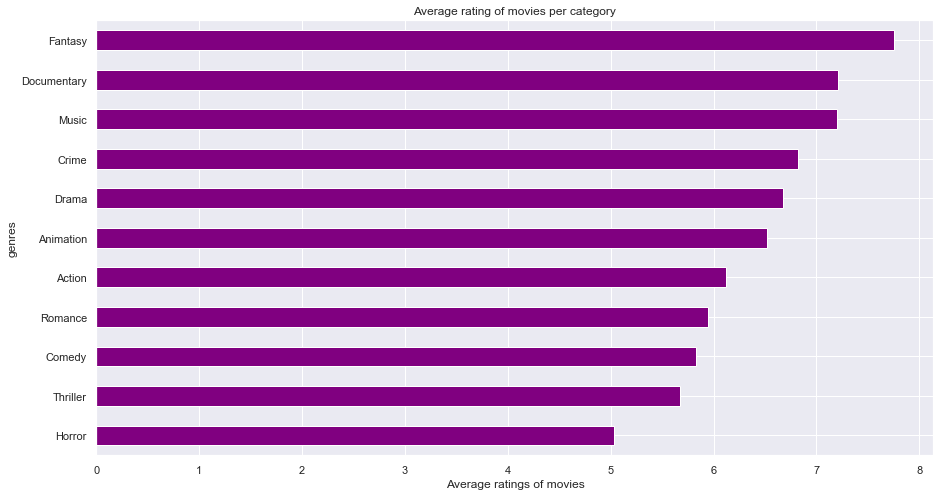

In [242]:
#Group genres by averagerating and get mean values and plot bar figure
df5.groupby(['genres'])['averagerating'].mean().sort_values().plot(kind='barh', figsize=(15,8), color='purple')
plt.title('Average rating of movies per category')
plt.xlabel("Average ratings of movies")

In [189]:
#Create new column total revenue which is the sum for domestic and foreign gross
df5['totalrevenue']=df5['domestic_gross'] + df5['foreign_gross']

In [190]:
df5.head(10)

,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year,totalrevenue
title,,,,,,,,,,,
50/50,50/50,2010,77.0,Documentary,7.5,11,Sum.,35000000.0,4.200000e+06,2011,3.920000e+07
A Beautiful Planet,A Beautiful Planet,2016,46.0,Documentary,7.4,893,Imax,15500000.0,9.400000e+06,2016,2.490000e+07
A Quiet Place,A Quiet Place,2016,80.0,Documentary,6.6,18,Par.,188000000.0,1.529000e+08,2018,3.409000e+08
Ai Weiwei: Never Sorry,Ai Weiwei: Never Sorry,2012,91.0,Documentary,7.6,3974,IFC,534000.0,7.505704e+07,2012,7.559104e+07
An Inconvenient Sequel: Truth to Power,An Inconvenient Sequel: Truth to Power,2017,98.0,Documentary,6.3,6752,Par.,3500000.0,1.900000e+06,2017,5.400000e+06
Another Year,You yi nian,2016,181.0,Documentary,7.2,40,SPC,3200000.0,1.650000e+07,2010,1.970000e+07
Archipelago,Archipelago,2017,61.0,Documentary,6.1,46,KL,7800.0,4.920000e+05,2014,4.998000e+05
Awake: The Life of Yogananda,Awake: The Life of Yogananda,2014,87.0,Documentary,7.3,957,CF&SR,1500000.0,7.505704e+07,2014,7.655704e+07
Babies,Bébé(s),2010,79.0,Documentary,7.1,6672,Focus,7300000.0,2.200000e+06,2010,9.500000e+06


Text(0.5, 0, 'Total revenue in dollars')

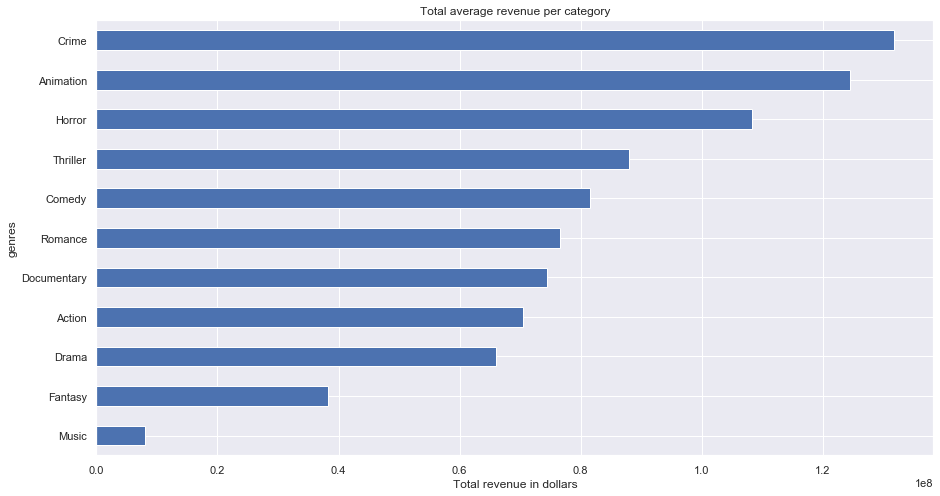

In [236]:
#Plot bar figure for the total revenue for movie category
df5.groupby(['genres'])['totalrevenue'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Total average revenue per category')
plt.xlabel("Total revenue in dollars")

In [192]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 50/50 to The Other Side
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   609 non-null    object 
 1   start_year       609 non-null    int64  
 2   runtime_minutes  609 non-null    float64
 3   genres           609 non-null    object 
 4   averagerating    609 non-null    float64
 5   numvotes         609 non-null    int64  
 6   studio           609 non-null    object 
 7   domestic_gross   609 non-null    float64
 8   foreign_gross    609 non-null    float64
 9   year             609 non-null    int64  
 10  totalrevenue     609 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 57.1+ KB


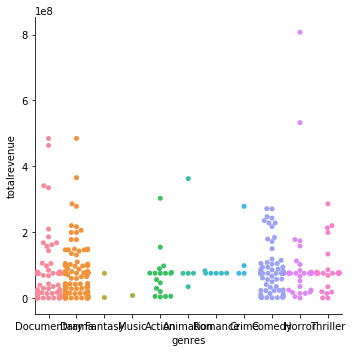

In [193]:
import seaborn as sns

sns.catplot(data=df5, x="genres", y="totalrevenue",  kind="swarm")

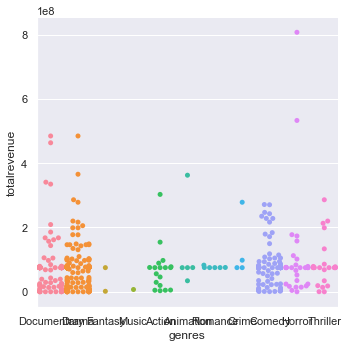

In [213]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,100)})


sns.catplot(data=df5, x="genres", y="totalrevenue",  kind="swarm", ax=ax)

In [194]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 609 entries, 50/50 to The Other Side
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   609 non-null    object 
 1   start_year       609 non-null    int64  
 2   runtime_minutes  609 non-null    float64
 3   genres           609 non-null    object 
 4   averagerating    609 non-null    float64
 5   numvotes         609 non-null    int64  
 6   studio           609 non-null    object 
 7   domestic_gross   609 non-null    float64
 8   foreign_gross    609 non-null    float64
 9   year             609 non-null    int64  
 10  totalrevenue     609 non-null    float64
dtypes: float64(5), int64(3), object(3)
memory usage: 77.1+ KB


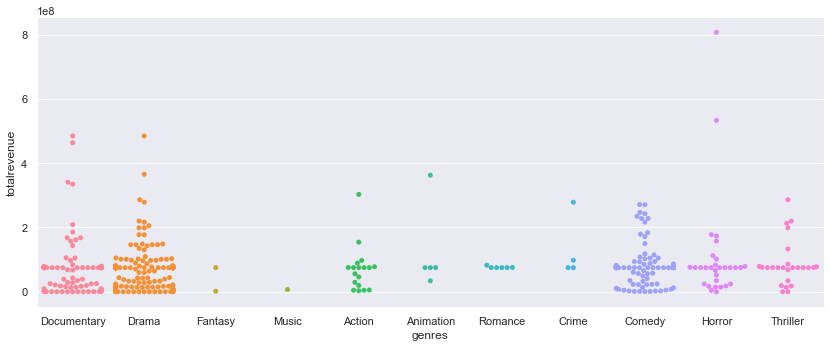

In [234]:
from matplotlib import pyplot
import seaborn as sns

g=sns.catplot(data=df5, x="genres", y="totalrevenue",  kind="swarm", aspect=11.7/5)



## 7. Statistics and Data Modelling 

In [195]:
# Correlation 
#covariance_matrix = np.cov(genres,domestic_gross)
#covariance_matrix[0][1]

In [196]:
#Calculation of correlation coefficient betweeen the 
#studied factors: genres, domestic_gross, foreign_gross and average_rating

x=df5.loc[:, 'genres']
f=df5.loc[:, 'foreign_gross']
d=df5.loc[:, 'domestic_gross']
t=df5.loc[:, 'totalrevenue']
r=df5.loc[:, 'averagerating']

covariance_matrix1 = np.corrcoef(f,d)

covariance_matrix2 = np.corrcoef(f,r)
covariance_matrix3 = np.corrcoef(d,r)
covariance_matrix4 = np.corrcoef(t,r)
print(covariance_matrix1, covariance_matrix2, covariance_matrix3, covariance_matrix4)

[[1.         0.39064248]
 [0.39064248 1.        ]] [[1.         0.01794546]
 [0.01794546 1.        ]] [[ 1.         -0.09145105]
 [-0.09145105  1.        ]] [[ 1.         -0.02818318]
 [-0.02818318  1.        ]]


In [197]:
#Create regression models

from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
model = smf.ols('totalrevenue ~ genres', df5).fit()
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:           totalrevenue   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.984
Date:                Wed, 03 Feb 2021   Prob (F-statistic):             0.0328
Time:                        18:08:29   Log-Likelihood:                -11864.
No. Observations:                 609   AIC:                         2.375e+04
Df Residuals:                     598   BIC:                         2.380e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              7.041e+

In [198]:
model2 = smf.ols('domestic_gross ~ foreign_gross', df5).fit()
print(model2.summary()) 

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     109.3
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           1.23e-23
Time:                        18:08:29   Log-Likelihood:                -11340.
No. Observations:                 609   AIC:                         2.268e+04
Df Residuals:                     607   BIC:                         2.269e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.699e+05   1.81e+06      0.314

In [199]:
model3 = smf.ols('foreign_gross ~ genres', df5).fit()
print(model3.summary()) 

                            OLS Regression Results                            
Dep. Variable:          foreign_gross   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.196
Date:                Wed, 03 Feb 2021   Prob (F-statistic):              0.291
Time:                        18:08:29   Log-Likelihood:                -11679.
No. Observations:                 609   AIC:                         2.338e+04
Df Residuals:                     598   BIC:                         2.343e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              6.008e+

In [237]:
model4 = smf.ols('domestic_gross ~ genres', df5).fit()
print(model4.summary()) 

                            OLS Regression Results                            
Dep. Variable:         domestic_gross   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     3.275
Date:                Thu, 04 Feb 2021   Prob (F-statistic):           0.000385
Time:                        09:26:29   Log-Likelihood:                -11374.
No. Observations:                 609   AIC:                         2.277e+04
Df Residuals:                     598   BIC:                         2.282e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              1.033e+

In [240]:
model5 = smf.ols('averagerating ~ domestic_gross + foreign_gross', df5).fit()
print(model5.summary()) 

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.606
Date:                Thu, 04 Feb 2021   Prob (F-statistic):             0.0277
Time:                        09:28:44   Log-Likelihood:                -931.09
No. Observations:                 609   AIC:                             1868.
Df Residuals:                     606   BIC:                             1881.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.4790      0.069     94.

In [241]:
model6 = smf.ols('averagerating ~ totalrevenue', df5).fit()
print(model6.summary()) 

                            OLS Regression Results                            
Dep. Variable:          averagerating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4825
Date:                Thu, 04 Feb 2021   Prob (F-statistic):              0.488
Time:                        09:29:26   Log-Likelihood:                -934.45
No. Observations:                 609   AIC:                             1873.
Df Residuals:                     607   BIC:                             1882.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5324      0.066     99.390   

## 8. Summary and Conclusion

In [201]:
#Conclusion
#National: the fisrt 3 movie categories with highest average revenues: Crime, Horror and animation
#International: the fisrt 3 movie categories with highestaverage revenue: Animation, Crime and Horror
# The first 3 movie categories with the most revenues as calculated by total revenues are: Crime, Animation, Horror.
# Movie categories with higestaverage ratings: Fantasy, Documentary and Music.
# There is no correlation between the rating of the movie and revenue (domestic or foreign)
# linear Regression models confirm the results showing animation, horror and crime with the highest coefficients. 